In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [199]:
bike_df = pd.read_csv('./bike-sharing-demand/bike_train.csv')

In [137]:
bike_df.shape

(10886, 12)

In [138]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [139]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [140]:
# datetime 년, 월, 일 , 시간 칼럼 추출
#문자열 datatime 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [141]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

In [142]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [143]:
## 불필요 컬럼 삭제
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [144]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


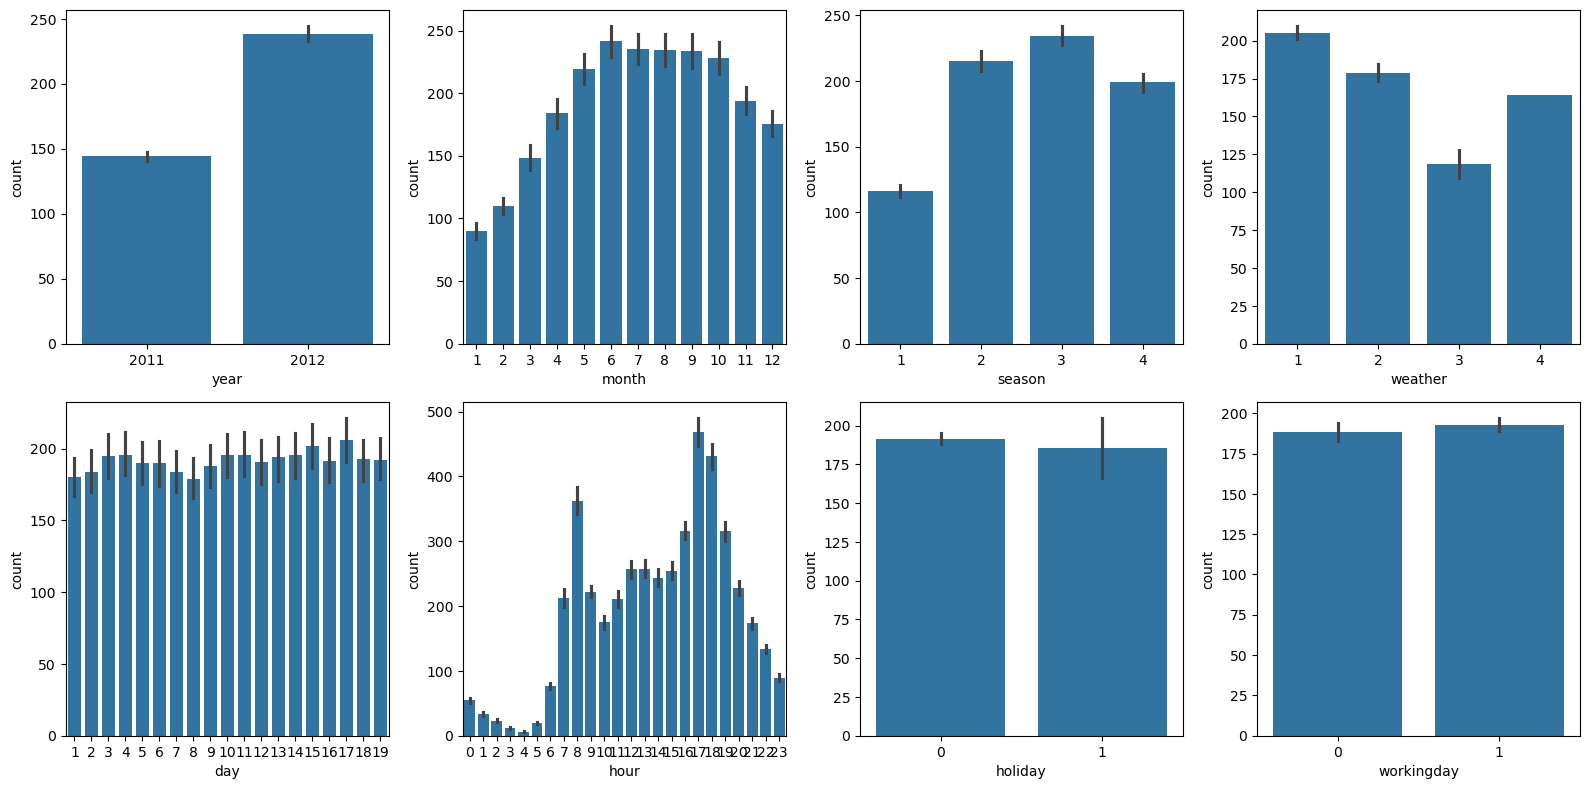

In [145]:
# 주요 컬럼별 Target값인 count가 어떻게 분포 되어 있는지 시각화
fig, axs = plt.subplots(figsize = (16, 8), ncols=4, nrows=2)
cat_features = ['year','month','season','weather','day','hour','holiday','workingday']

for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

plt.tight_layout()  # 그래프 간격을 조절합니다.


In [146]:
## 성능평가함수
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log값 변환 시 NaN 등 이슈로 log() 가 아닌 log1p를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y =- np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()를 이용해 rmse 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))


# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred) :
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE 는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [147]:
## 로그변환, 피처인코딩과 모델 학습/예측/평가
#### 회귀모델 적용 전 확인 및 처리 사항
# 1-결과값이 정규분포로 되어 있는지 확인
# 2-카테고리형 회귀 모델의 경우 원-핫 인코딩으로 피처를 인코딩 할 것

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 9.999, RMSE : 140.900, MAE : 105.924


In [149]:
# 실제값과 예측값이 어느 정도 차이가 나는지 DataFrame컬럼으로 . 오류값 가장 큰 순으로 5개만 확인
def get_top_error_data(y_test, pred, n_tops = 5):
    reslut_df = pd.DataFrame(y_test.values, columns=['real_count'])
    reslut_df['predicted_count'] = np.round(pred)
    reslut_df['diff'] = np.abs(reslut_df['real_count']) - reslut_df['predicted_count']

    # 예측값과 실제 값이 가장 큰 데이터 순으로 출력
    print(reslut_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
966          884            327.0  557.0
3151         798            241.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

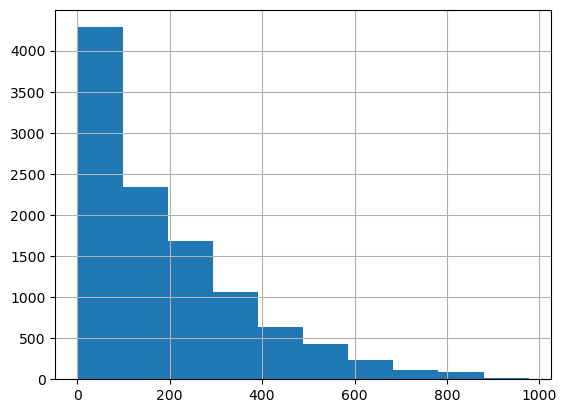

In [150]:
# 예측 오류가 큰 상황. Target 값의 분포가 왜곡 된 형태인지 확인 한다. Target 의 분포는 정규 분포가 가장 좋다.
y_target.hist()  # 0~200 사이에 왜곡

<Axes: >

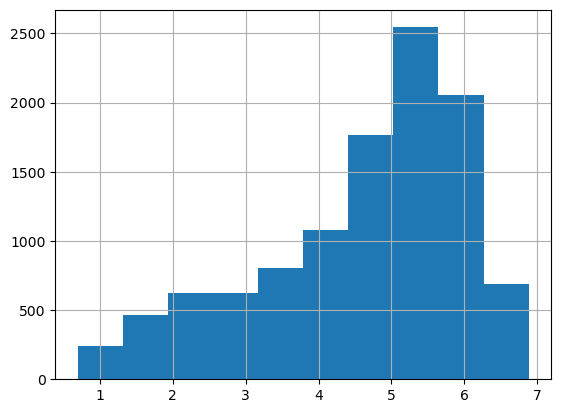

In [151]:
# 정규분포로 바꾸는 일반적인 방법 : log 변환 . 여기서는 log1p() 를 이용 하겠음.
y_log_transfrom = np.log1p(y_target)
y_log_transfrom.hist()
# 정규 분포는 아니지만, 변환 전보다는 왜곡 상태가 많이 향상 된 상태.

In [152]:
# 이를 이용후 다시 학습 후 평가 수행
# 타깃 컬럼 count값을 log1p로   로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영 학습/ 테스트/ 데이트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

#테스트 데이터셋트의 Target값은 로그 변환 됐으므로, 다시 expm1을 이용 해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)
#예측값 역시 로그 변환 됐으므로, 다시 expm1을 이용 해 원래 스케일로 변환
pred_exp = np.expm1(pred)


evaluate_regr(y_test_exp, pred_exp)

RMSLE : 9.482, RMSE : 162.594, MAE : 109.286


<Axes: ylabel='None'>

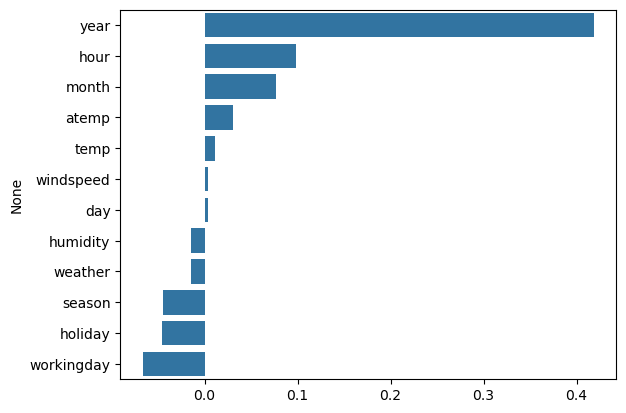

In [153]:
# RMSLE : 9.999, RMSE : 140.900, MAE : 105.924
#### RMSLE 는 줄었으나 , RMSE는 더 늘어 남.

coef = pd.Series(lr_reg.coef_ , index=X_features.columns)
coef_sort  =coef.sort_values(ascending = False)
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [154]:
# 연도 , 시간, 월 등은 숫자의 데이터 값을 갖고 있으나, 의미는 카테고리다. 
## 카테고리 형태의 피쳐들을 원핫 인코딩 한다.
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [155]:
## LinearRegression, Ridge, Lasso 모두 학습 예측 성능 확인 하기
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE : 9.597, RMSE : 97.688, MAE : 63.382
### Ridge ###
RMSLE : 9.589, RMSE : 98.529, MAE : 63.893
### Lasso ###
RMSLE : 9.556, RMSE : 113.219, MAE : 72.803


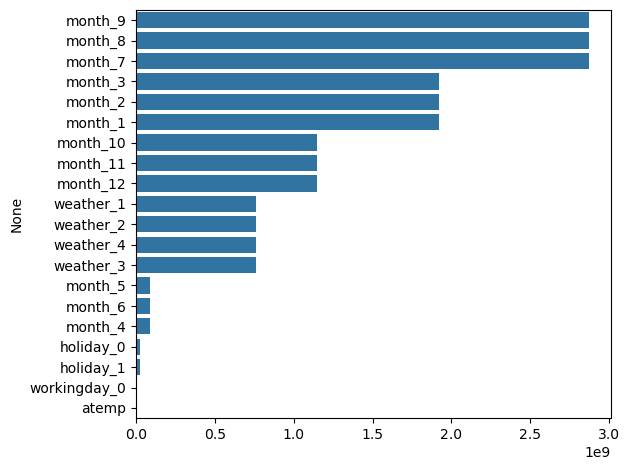

In [197]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)
plt.tight_layout()

In [157]:
## 회귀 트리를 이용해 회귀 예측 수행
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg] :
    #XGBoost Dataframe 의 경우 버전에 따라 오류 발생 되므로, ndarray 로변환
    get_model_predict(model , X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE : 9.638, RMSE : 50.218, MAE : 31.113
### GradientBoostingRegressor ###
RMSLE : 9.627, RMSE : 53.334, MAE : 32.744
### XGBRegressor ###
RMSLE : 9.635, RMSE : 51.475, MAE : 31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE : 9.633, RMSE : 47.215, MAE : 29.029
